In [28]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt

In [29]:
dates = glob.glob('fitting_output/*')
dates = [date[-6:] for date in dates]
dates.sort()
print(dates)

['131216', '131217', '140111', '140118', '140314', '140607', '140609', '140610', '140707', '140708', '140711', '140810', '141104']


In [30]:
index = 0
for date in dates:
    date_products = glob.glob('fitting_output/'+date+'/*_curvefit_tlfvv_payne.fits')
    date_products.sort()
    for one_product in date_products:
        new_table = Table.read(one_product)
        new_table['tmass_id'] = str(new_table['tmass_id'][0])
        if np.isfinite(new_table['gaia_edr3_source_id'][0]):
            new_table['gaia_edr3_source_id'] = int(new_table['gaia_edr3_source_id'][0])
        else:
            new_table['gaia_edr3_source_id'] = int(-1)
        if index == 0:
            data = new_table
        else:
            data = vstack([data, new_table])
        index += 1
data['gaia_edr3_source_id'] = [int(x) for x in data['gaia_edr3_source_id']]

In [31]:
data.write('galah_dr4_allspec.fits',overwrite=True)

In [32]:
data

sobject_id,tmass_id,gaia_edr3_source_id,flag_sp,teff,cov_e_teff,logg,cov_e_logg,fe_h,cov_e_fe_h,flag_fe_h,vmic,cov_e_vmic,vsini,cov_e_vsini,li_fe,cov_e_li_fe,flag_li_fe,c_fe,cov_e_c_fe,flag_c_fe,n_fe,cov_e_n_fe,flag_n_fe,o_fe,cov_e_o_fe,flag_o_fe,na_fe,cov_e_na_fe,flag_na_fe,mg_fe,cov_e_mg_fe,flag_mg_fe,al_fe,cov_e_al_fe,flag_al_fe,si_fe,cov_e_si_fe,flag_si_fe,k_fe,cov_e_k_fe,flag_k_fe,ca_fe,cov_e_ca_fe,flag_ca_fe,sc_fe,cov_e_sc_fe,flag_sc_fe,ti_fe,cov_e_ti_fe,flag_ti_fe,v_fe,cov_e_v_fe,flag_v_fe,cr_fe,cov_e_cr_fe,flag_cr_fe,mn_fe,cov_e_mn_fe,flag_mn_fe,co_fe,cov_e_co_fe,flag_co_fe,ni_fe,cov_e_ni_fe,flag_ni_fe,cu_fe,cov_e_cu_fe,flag_cu_fe,zn_fe,cov_e_zn_fe,flag_zn_fe,rb_fe,cov_e_rb_fe,flag_rb_fe,sr_fe,cov_e_sr_fe,flag_sr_fe,y_fe,cov_e_y_fe,flag_y_fe,zr_fe,cov_e_zr_fe,flag_zr_fe,mo_fe,cov_e_mo_fe,flag_mo_fe,ru_fe,cov_e_ru_fe,flag_ru_fe,ba_fe,cov_e_ba_fe,flag_ba_fe,la_fe,cov_e_la_fe,flag_la_fe,ce_fe,cov_e_ce_fe,flag_ce_fe,nd_fe,cov_e_nd_fe,flag_nd_fe,sm_fe,cov_e_sm_fe,flag_sm_fe,eu_fe,cov_e_eu_fe,flag_eu_fe,model_name
,,,,K,K,log(cm.s**-2),log(cm.s**-2),,,,km / s,km / s,km / s,km / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,bytes16,int64,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,bytes15
131216001601132,06414667-0126314,3107224193724925184,0,5654.145,9.410993,4.097913,0.019981675,0.055226643,0.0076933224,0,1.1788236,0.030226834,4.3308363,0.16124696,-0.20589331,0.19827041,1,0.09138646,0.013636551,0,0.40277663,0.037108425,1,0.23657568,0.02910587,0,0.22884215,0.02967694,0,0.13100739,0.017855518,0,0.22035423,0.022055455,0,0.04321537,0.012349026,0,0.20819326,0.044339605,0,-0.081611276,0.02077255,0,0.00430005,0.024015361,0,0.0115329195,0.012679762,0,-0.061576854,0.028381651,0,0.016738001,0.01350721,0,0.077035375,0.026201367,0,-0.025406592,0.029110052,0,0.059663612,0.00973426,0,-0.19076703,0.036776625,0,0.17374793,0.07393008,0,nan,nan,2,nan,nan,2,-0.27007663,0.0708555,0,-0.5615763,0.18432947,1,nan,nan,2,nan,nan,2,-0.27268022,0.04600879,0,nan,nan,2,nan,nan,2,-0.20066342,0.16826414,1,nan,nan,2,nan,nan,2,5750_4.00_0.00
131216001601163,06405546-0112291,3107287003326627456,0,5724.1357,4.1443305,4.26405,0.007721522,0.029434033,0.0034004946,0,1.1503005,0.014429529,5.117432,0.037701443,0.6250244,0.08757844,0,0.035029728,0.007290372,0,0.37025428,0.022768352,1,0.062338494,0.02660734,0,0.2092367,0.010461446,0,0.059117306,0.0064742425,0,0.3014381,0.015494525,0,0.051317316,0.005233392,0,0.040002037,0.016328324,0,-0.029336784,0.009420167,0,-0.028826995,0.010781953,0,-0.020746067,0.0057478,0,-0.12819201,0.012192216,0,0.013754353,0.0064183753,0,0.10265812,0.01039203,0,-0.10802715,0.014286196,0,0.029407542,0.0046038213,0,-0.14977695,0.015470981,0,-0.09049694,0.026489167,0,nan,nan,2,nan,nan,2,-0.23725322,0.029545566,0,-0.4188207,0.078024164,1,nan,nan,2,nan,nan,2,-0.1557568,0.018358085,0,nan,nan,2,nan,nan,2,0.18584287,0.022237947,0,nan,nan,2,nan,nan,2,5750_4.50_0.00
131216001601309,06432850-0017246,3119458214786640256,0,5695.824,24.966204,4.4120126,0.05637934,0.3357181,0.01838363,0,1.7699407,0.07368577,-0.24765515,0.87957454,-0.7834148,0.15870601,1,-0.08123747,0.05092193,1,0.23533158,0.13262925,1,-0.14607011,0.14942473,0,0.49395996,0.06793406,0,0.011223724,0.045473196,0,0.2378690

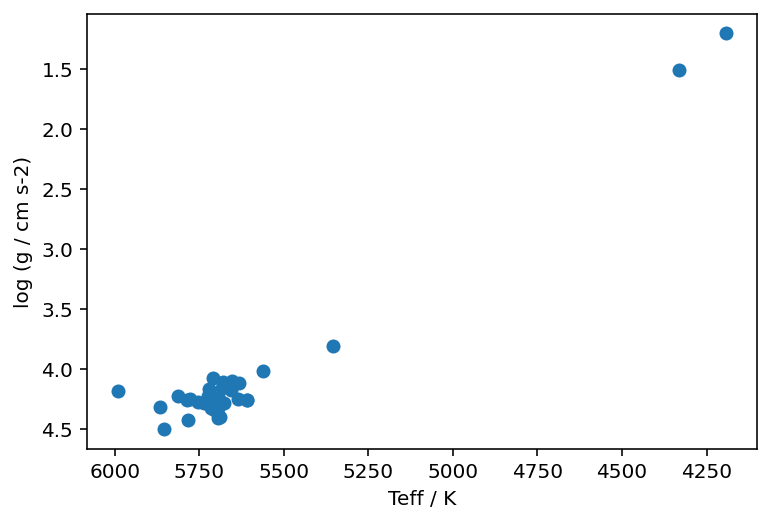

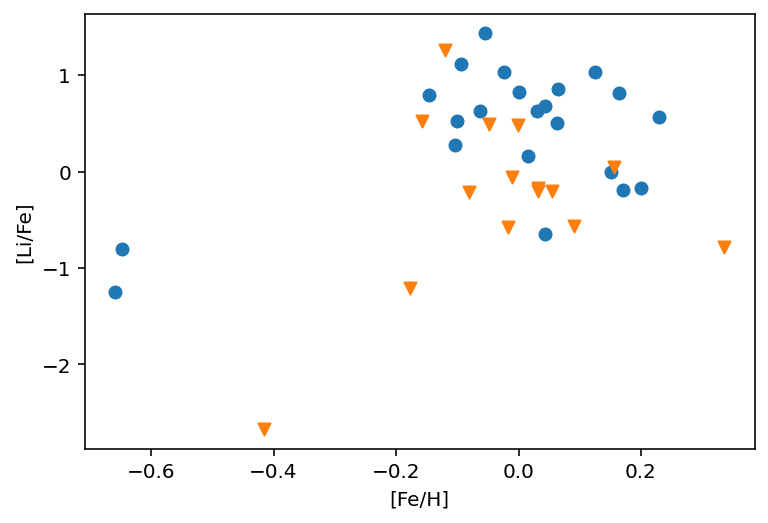

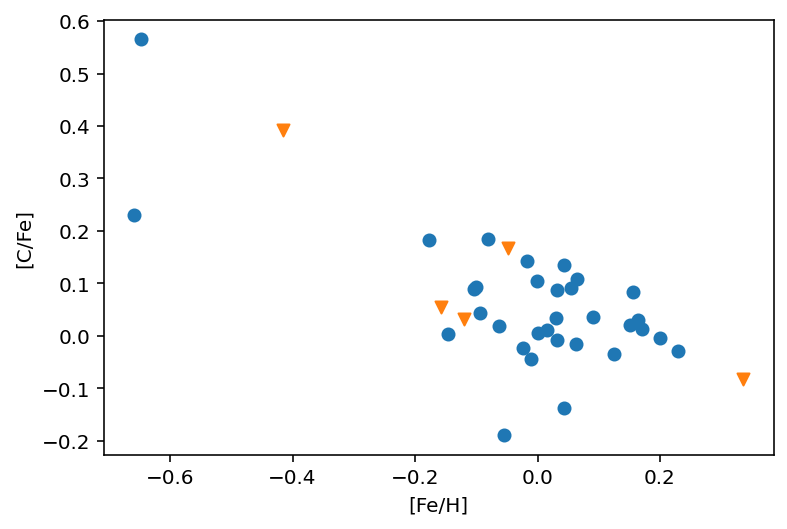

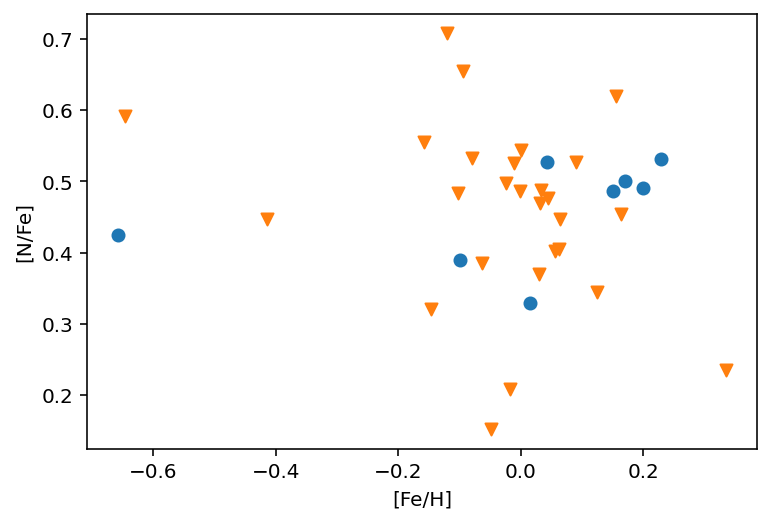

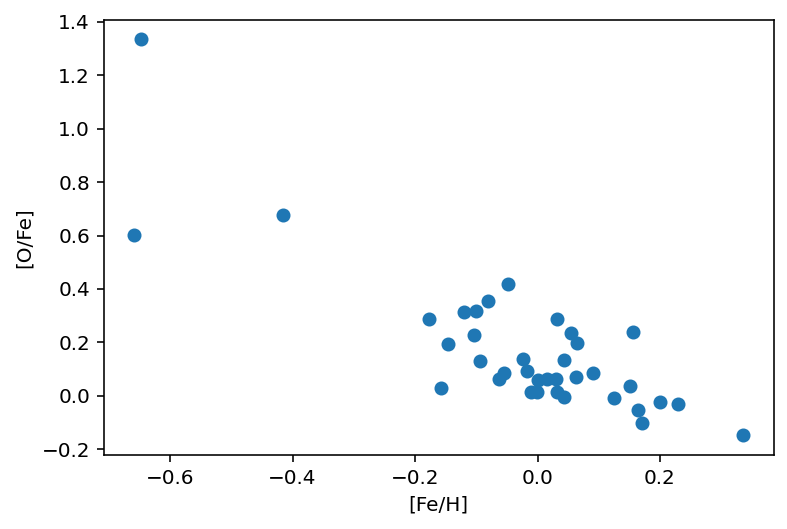

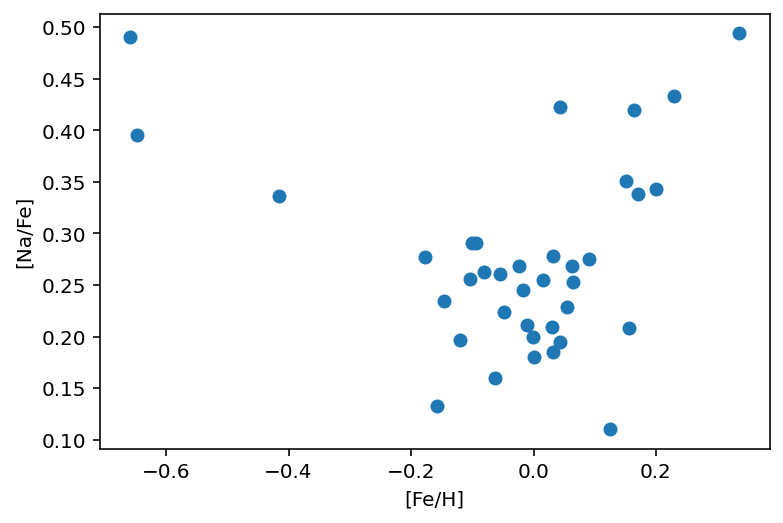

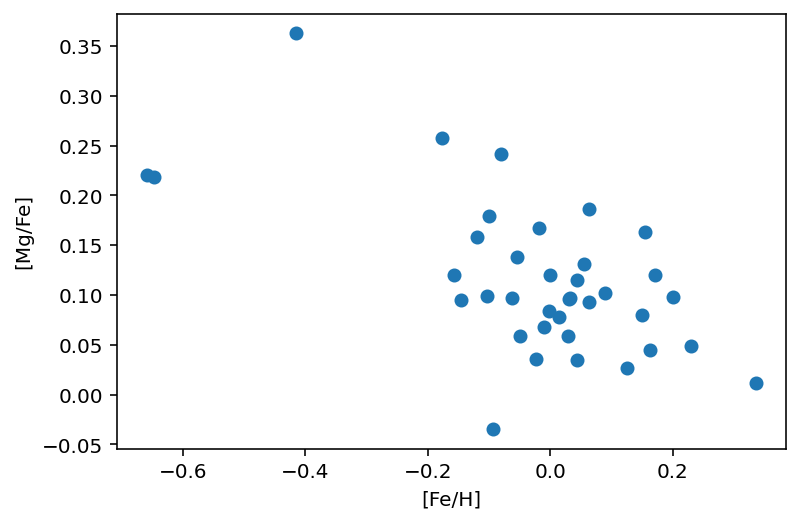

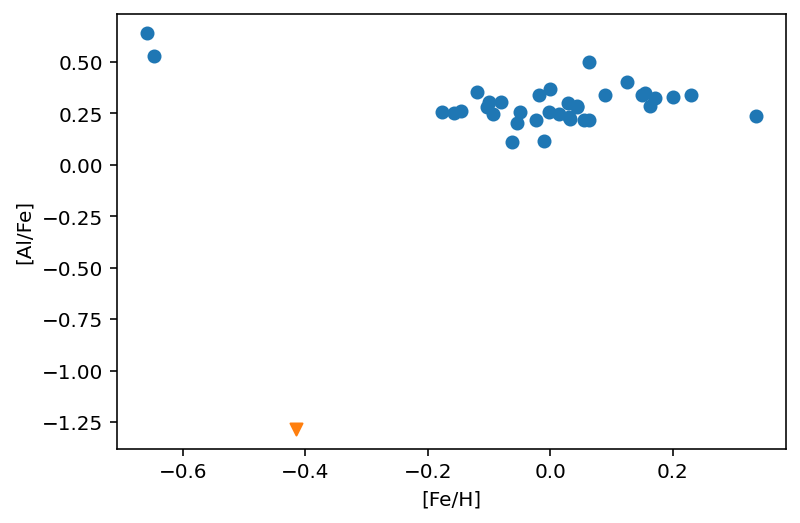

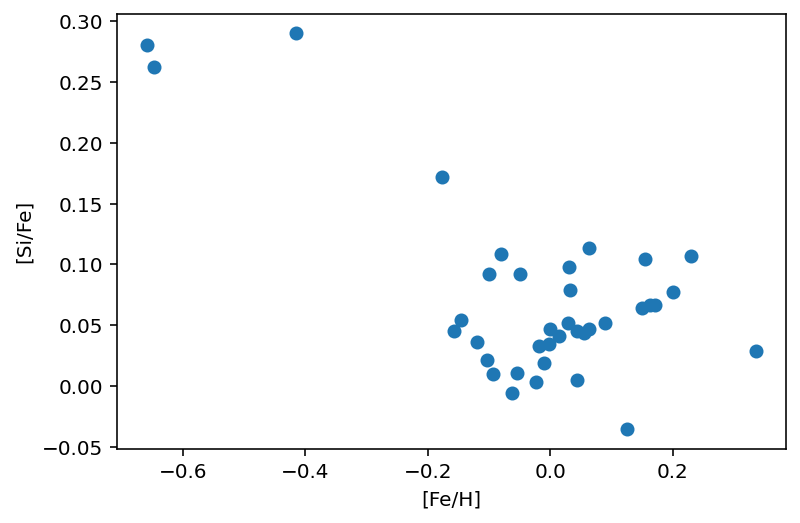

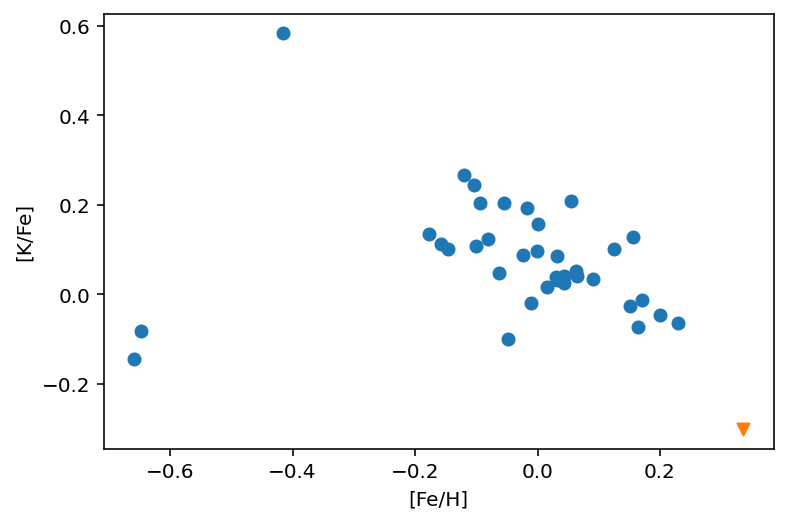

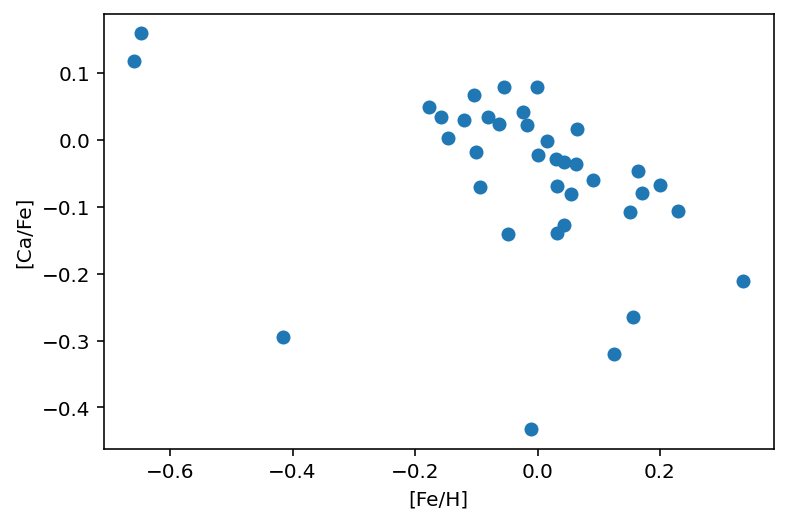

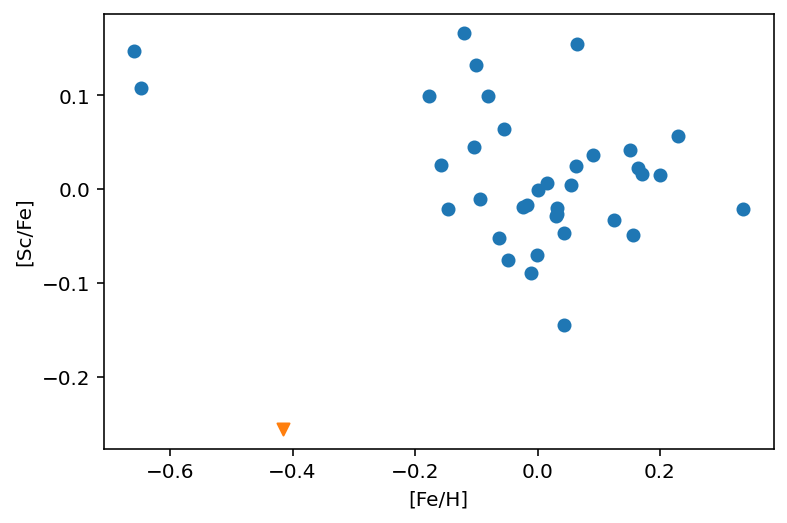

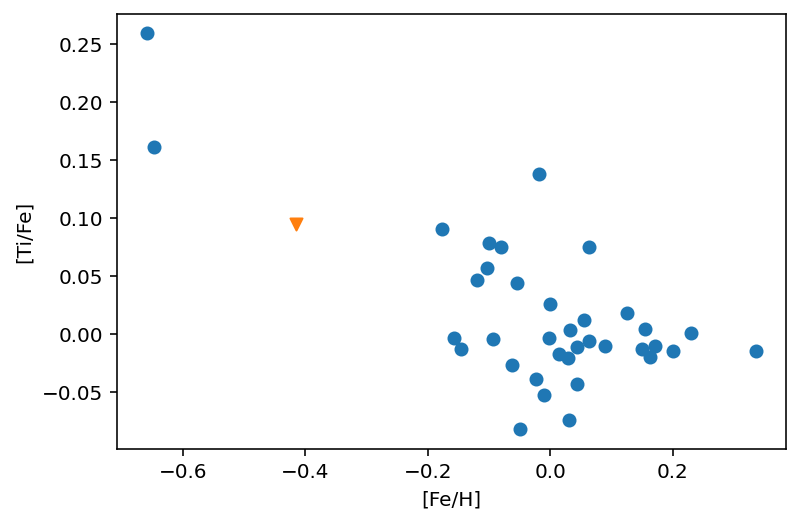

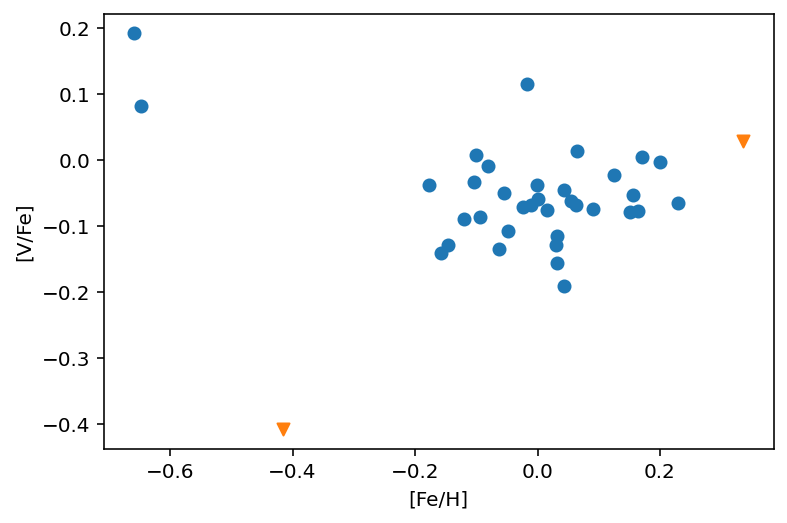

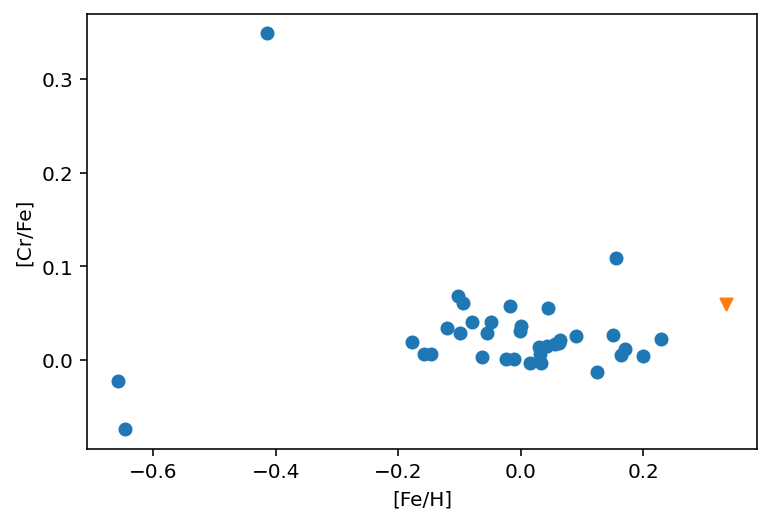

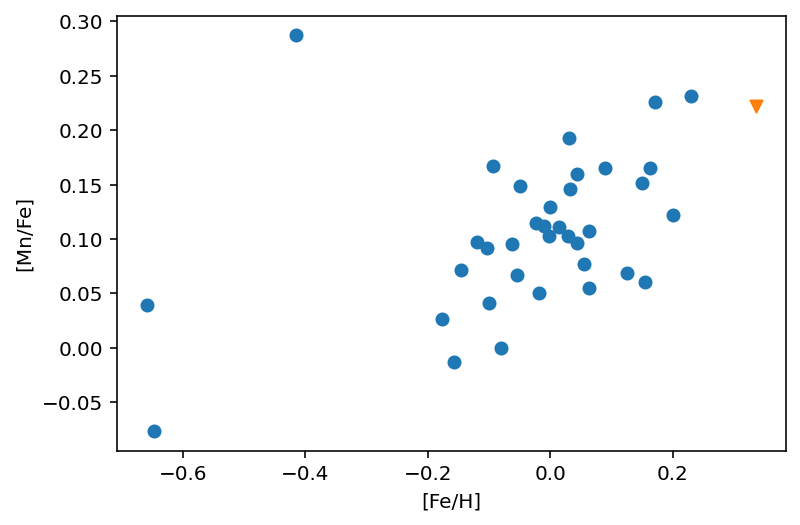

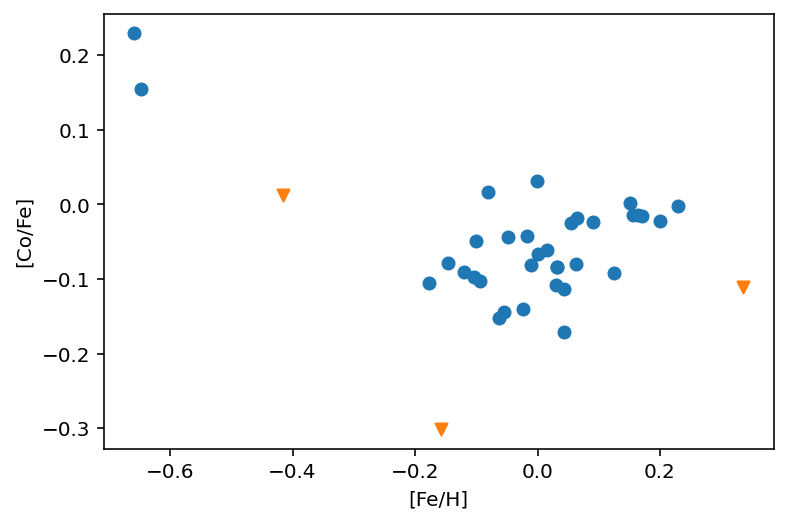

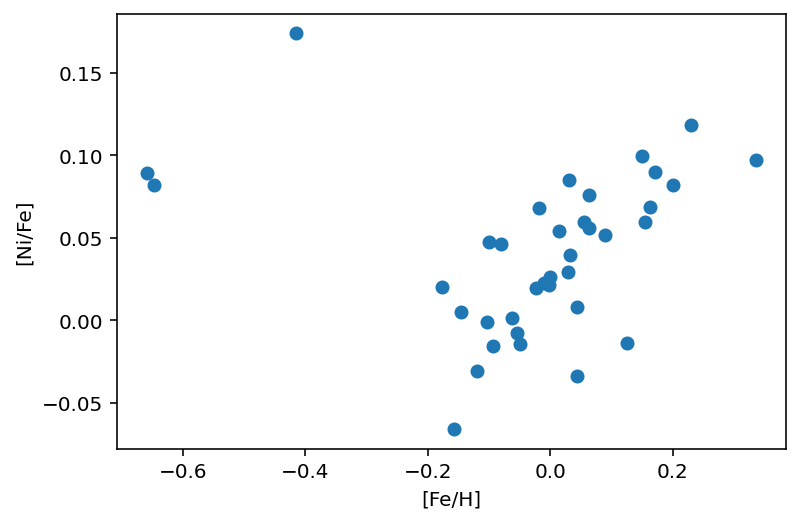

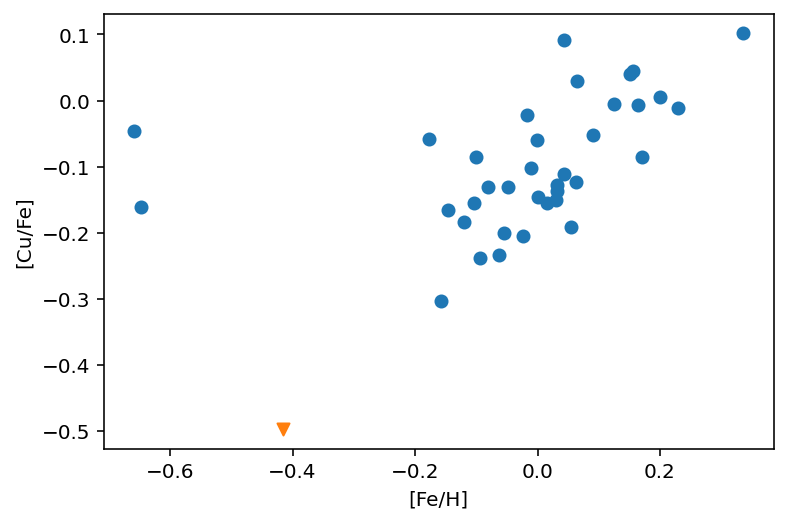

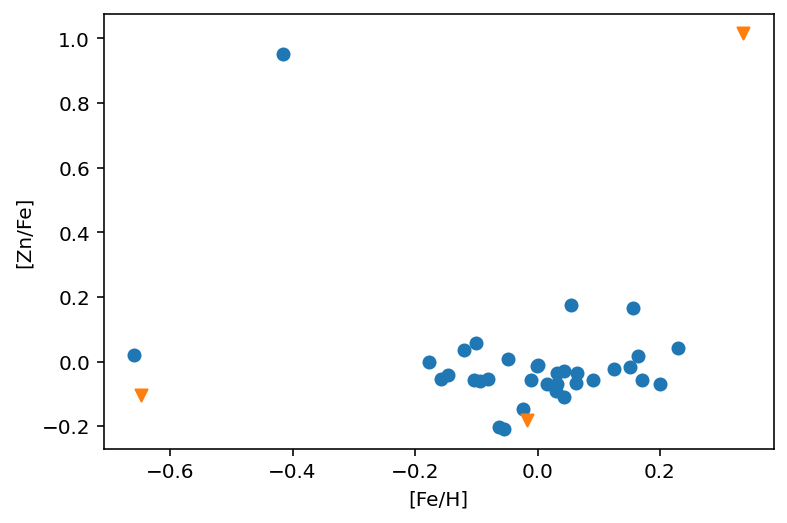

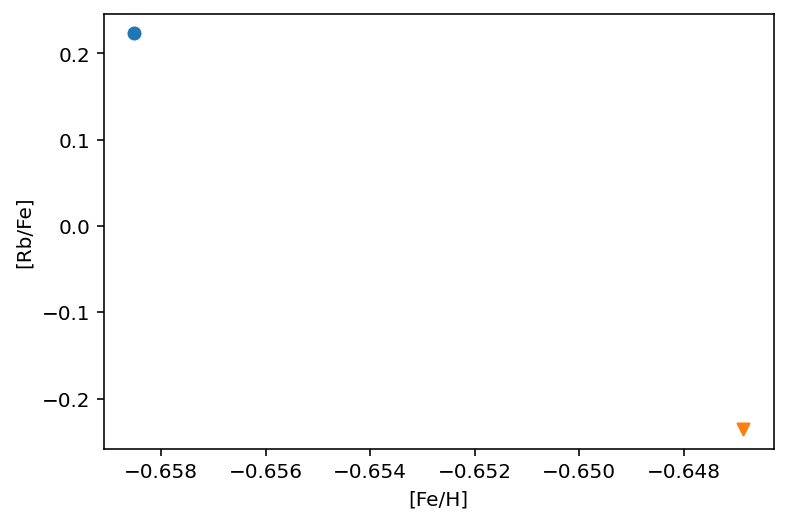

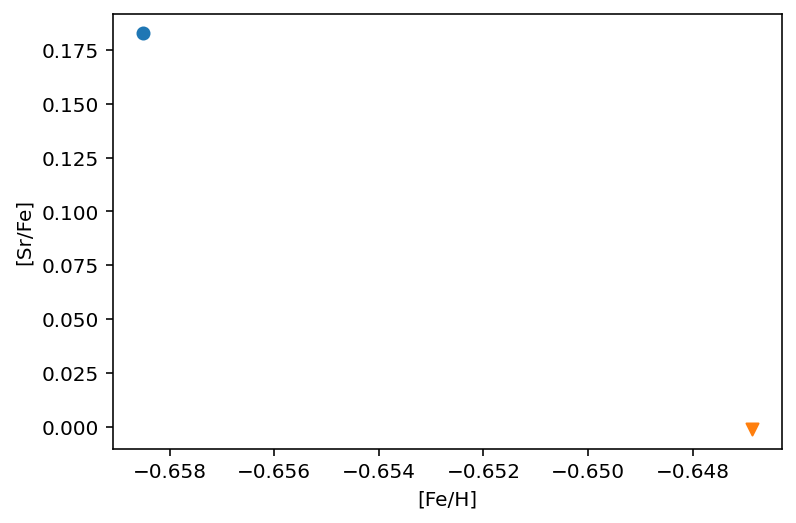

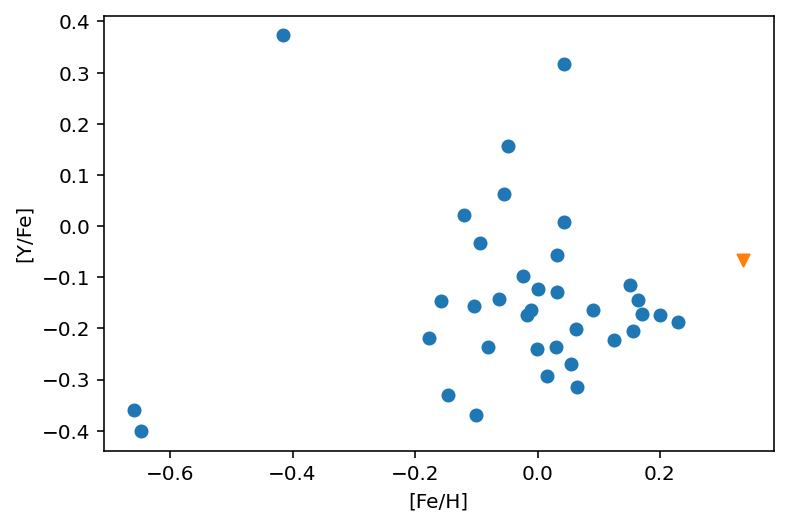

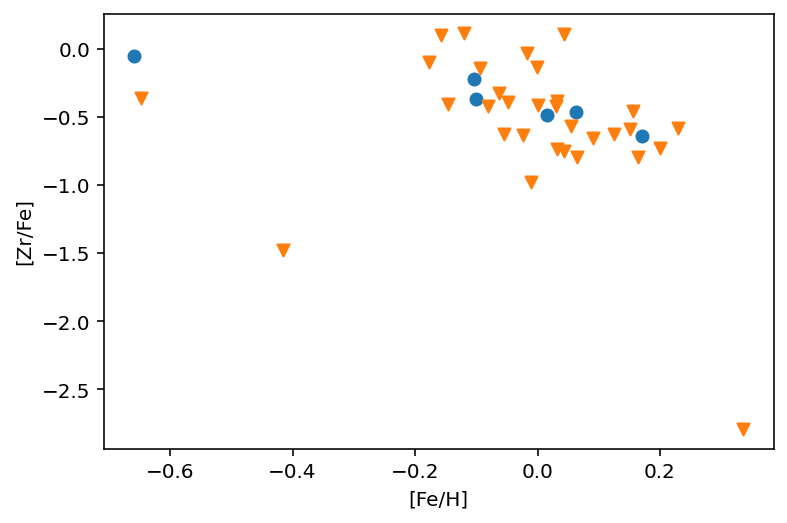

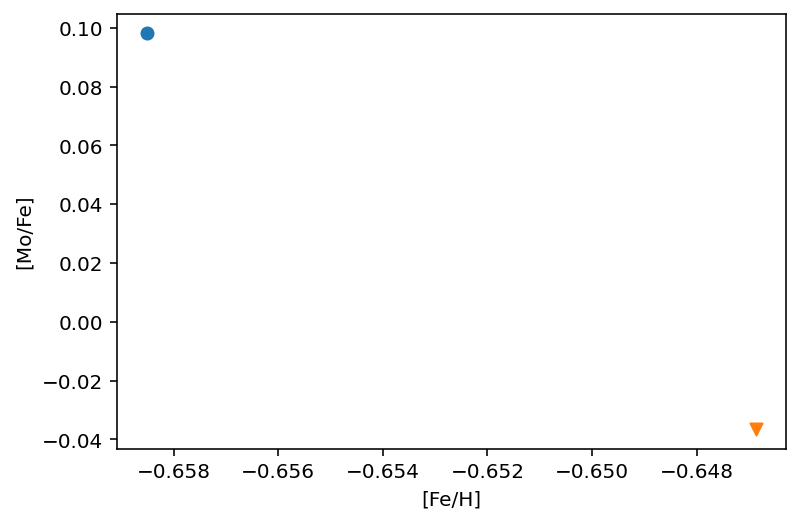

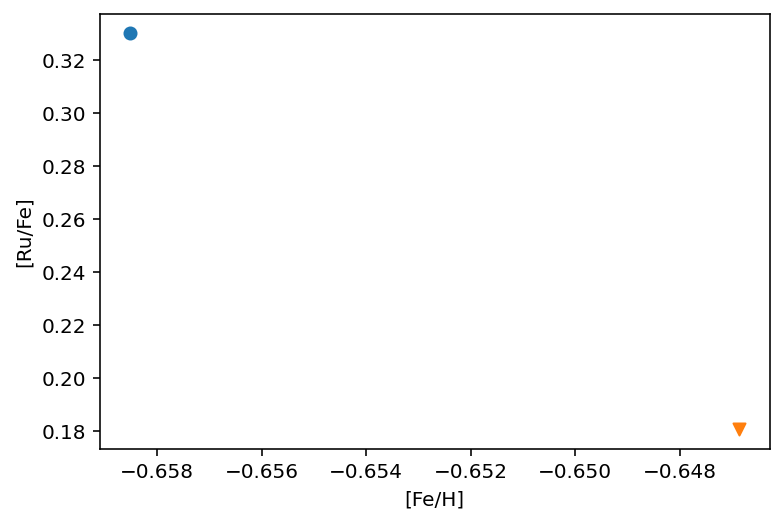

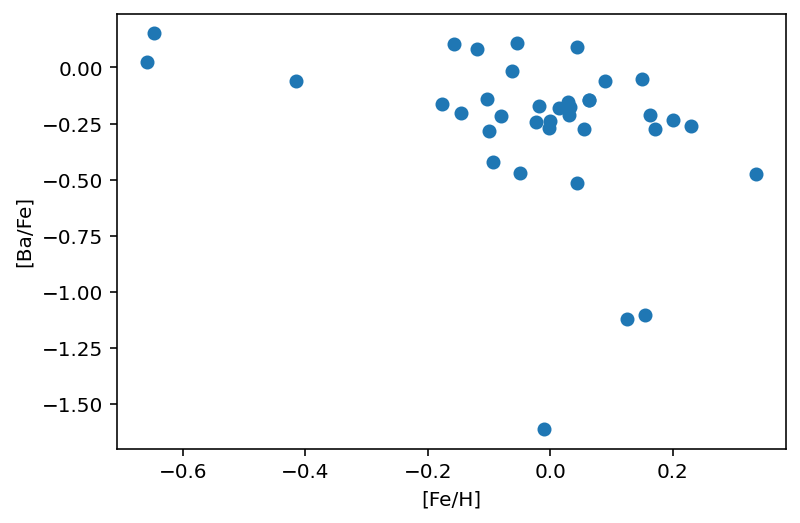

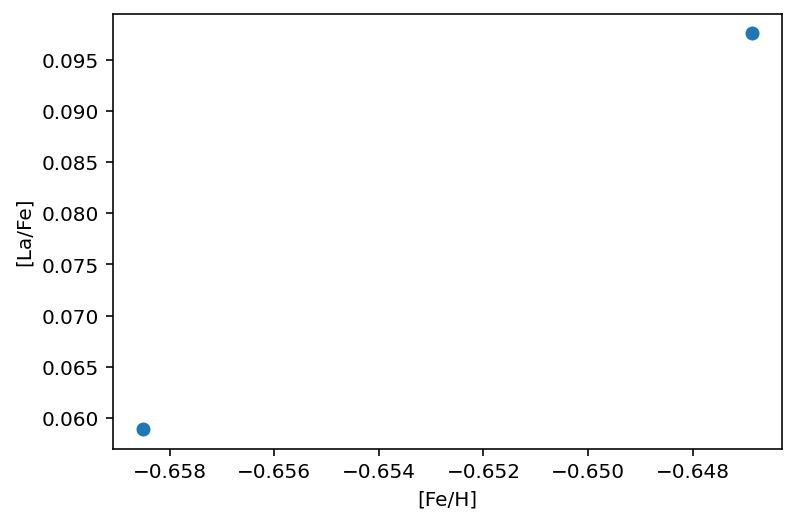

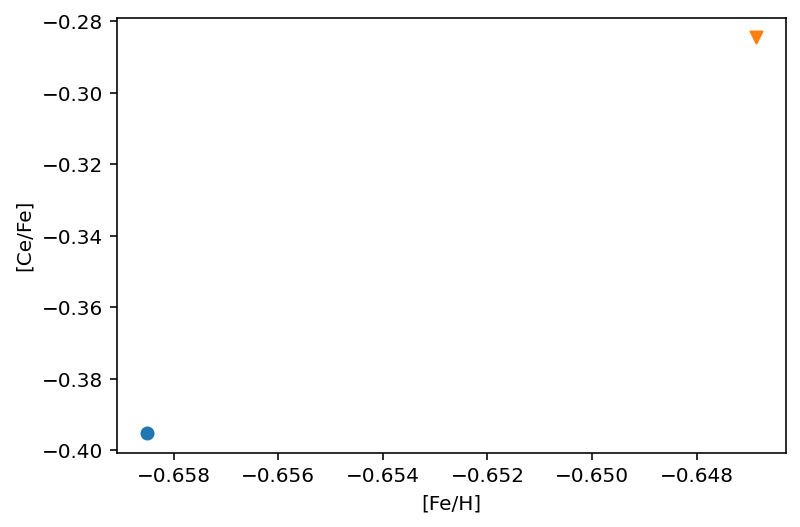

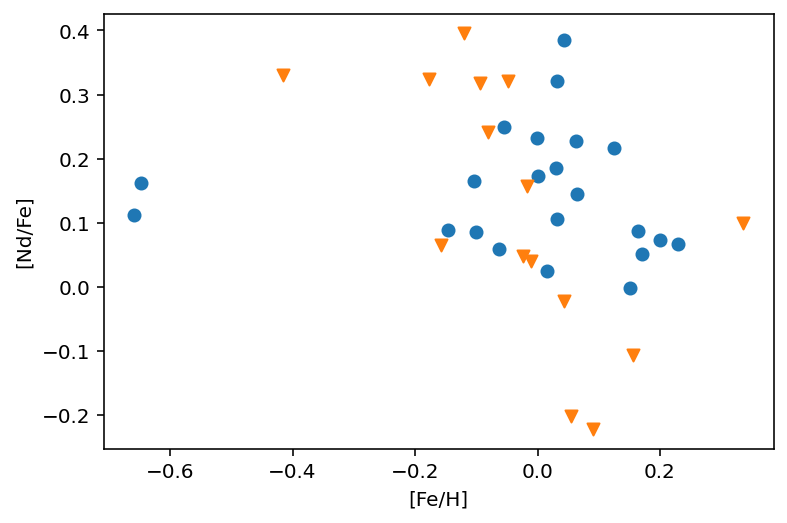

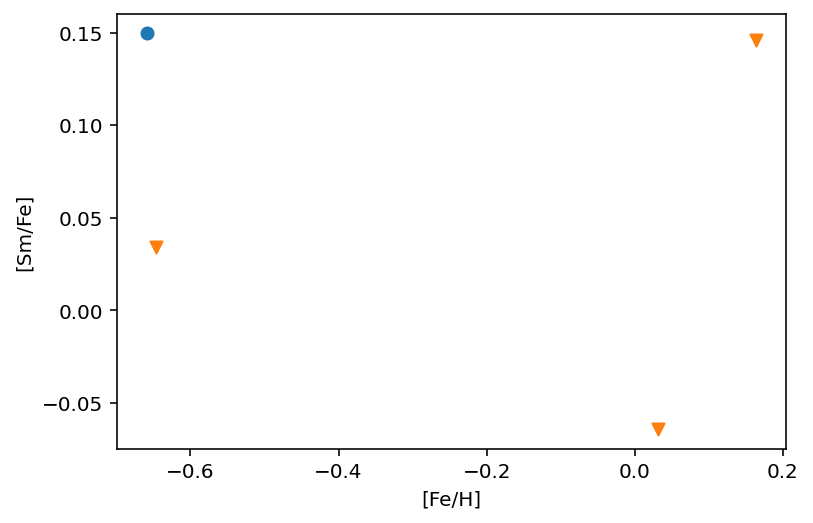

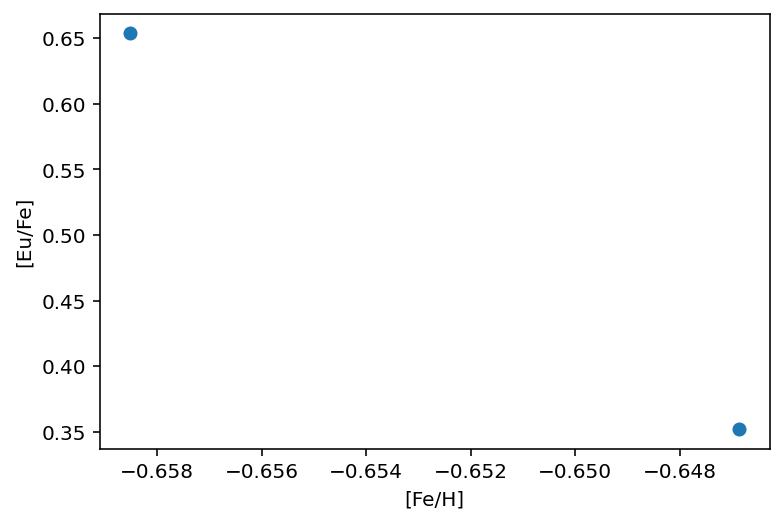

In [33]:
# Plot HRD & abundances 

flag0 = data['flag_sp'] == 0
flag1 = data['flag_sp'] > 0

if len(data) < 100:
    plt.figure()
    plt.scatter(
        data['teff'][flag0],
        data['logg'][flag0]
    )
    plt.scatter(
        data['teff'][flag1],
        data['logg'][flag1],
        marker='v'
    )
    plt.xlabel('Teff / K')
    plt.ylabel('log (g / cm s-2)')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
    plt.close()

for label in [
    'Li',
    'C',
    'N',
    'O',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Sc',
    'Ti',
    'V',
    'Cr',
    'Mn',
    'Co',
    'Ni',
    'Cu',
    'Zn',
    'Rb',
    'Sr',
    'Y',
    'Zr',
    'Mo',
    'Ru',
    'Ba',
    'La',
    'Ce',
    'Nd',
    'Sm',
    'Eu'
    ]:
    
    flag0 = data['flag_'+label.lower()+'_fe'] == 0
    flag1 = data['flag_'+label.lower()+'_fe'] == 1
    
    if len(data) < 100:
        plt.figure()
        plt.scatter(
            data['fe_h'][flag0],
            data[label.lower()+'_fe'][flag0]
        )
        plt.scatter(
            data['fe_h'][flag1],
            data[label.lower()+'_fe'][flag1],
            marker='v'
        )
        plt.xlabel('[Fe/H]')
        plt.ylabel('['+label+'/Fe]')
        plt.show()
        plt.close()